## Initial Imports and Data Loading

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
import os
import platform


In [ ]:
categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
                       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                       'nursery', 'higher', 'internet', 'romantic']

binary_features = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 
                  'internet', 'romantic']

ordinal_features = ['Medu', 'Fedu', 'Dalc', 'Walc', 'health']

categorical_to_encode = [feature for feature in categorical_features 
                         if feature not in binary_features + ordinal_features]

In [ ]:
data_orig = fetch_ucirepo(id=320)
X: pd.DataFrame
y: pd.DataFrame
X = data_orig.data.features
y = data_orig.data.targets

In [5]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,yes,no,5,4,2,1,2,5,4
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,yes,no,4,3,4,1,1,1,4
646,MS,F,18,U,GT3,T,1,1,other,other,...,yes,no,no,1,1,1,1,1,5,6
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,3,4,2,6


In [6]:
y

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13
...,...,...,...
644,10,11,10
645,15,15,16
646,11,12,9
647,10,10,10


In [ ]:
g1 = y.iloc[:, 0]
g2 = y.iloc[:, 1]
g3 = y.iloc[:, 2]

0      11
1      11
2      12
3      14
4      13
       ..
644    10
645    16
646     9
647    10
648    11
Name: G3, Length: 649, dtype: int64

In [25]:
cur_dir = os.getcwd()
join = '\\' if platform.platform() == 'Windows' else '/'
data_math = pd.read_csv(cur_dir + join + 'student-mat.csv', sep=';')
data_por = pd.read_csv(cur_dir + join + 'student-por.csv', sep=';')

In [31]:
math_targets = data_math.iloc[:, -3:]
por_targets = data_por.iloc[:, -3:]
math_targets, por_targets

(     G1  G2  G3
 0     5   6   6
 1     5   5   6
 2     7   8  10
 3    15  14  15
 4     6  10  10
 ..   ..  ..  ..
 390   9   9   9
 391  14  16  16
 392  10   8   7
 393  11  12  10
 394   8   9   9
 
 [395 rows x 3 columns],
      G1  G2  G3
 0     0  11  11
 1     9  11  11
 2    12  13  12
 3    14  14  14
 4    11  13  13
 ..   ..  ..  ..
 644  10  11  10
 645  15  15  16
 646  11  12   9
 647  10  10  10
 648  10  11  11
 
 [649 rows x 3 columns])

In [33]:
math_features = data_math.iloc[:, :-3]
math_features

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,yes,no,no,5,5,4,4,5,4,11
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,3,4,2,3
392,MS,M,21,R,GT3,T,1,1,other,other,...,yes,no,no,5,5,3,3,3,3,3
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,yes,no,4,4,1,3,4,5,0


Checking for imbalances in features...

Found 6 imbalanced features where one class exceeds 80.0% of data:
- Pstatus: top class represents 87.67% of data
- schoolsup: top class represents 89.52% of data
- paid: top class represents 93.99% of data
- nursery: top class represents 80.28% of data
- higher: top class represents 89.37% of data
- failures: top class represents 84.59% of data


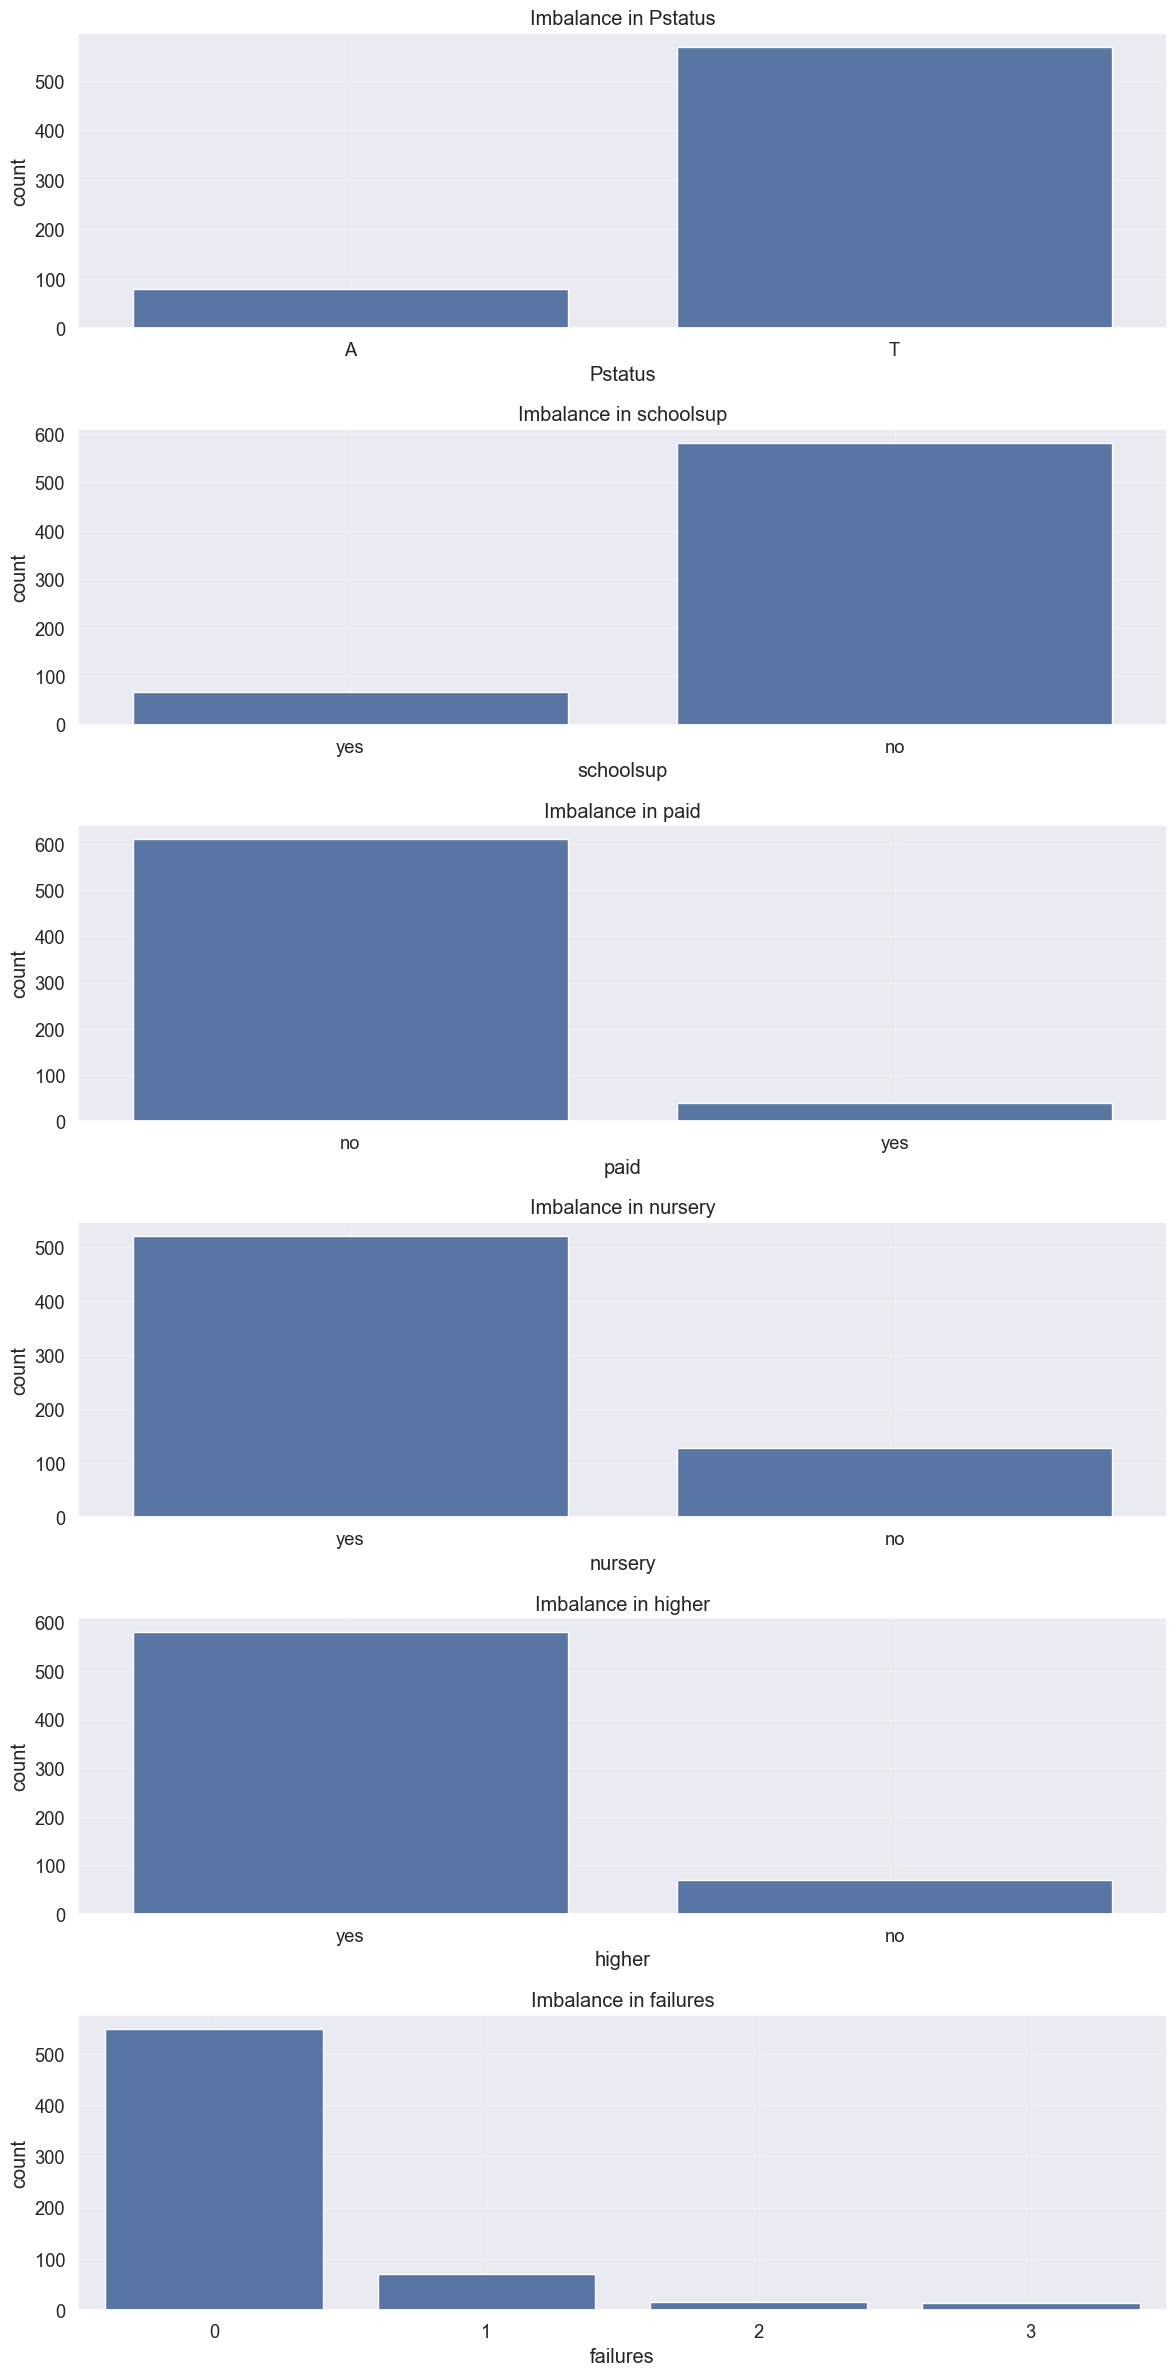


Found 1 severely skewed numerical features:
- absences: skewness = 2.02


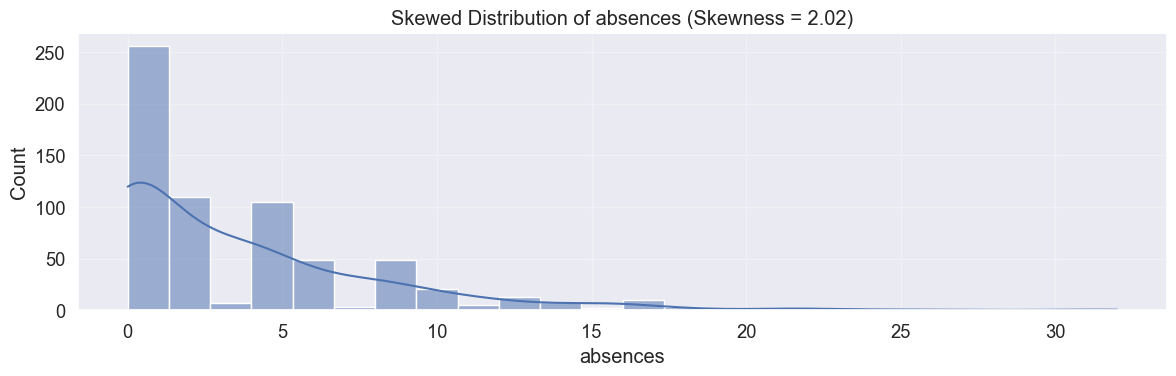


Handling imbalanced categorical features...
Note: The following categorical features are highly imbalanced and may need special handling: ['Pstatus', 'schoolsup', 'paid', 'nursery', 'higher']

Handling skewed numerical features...


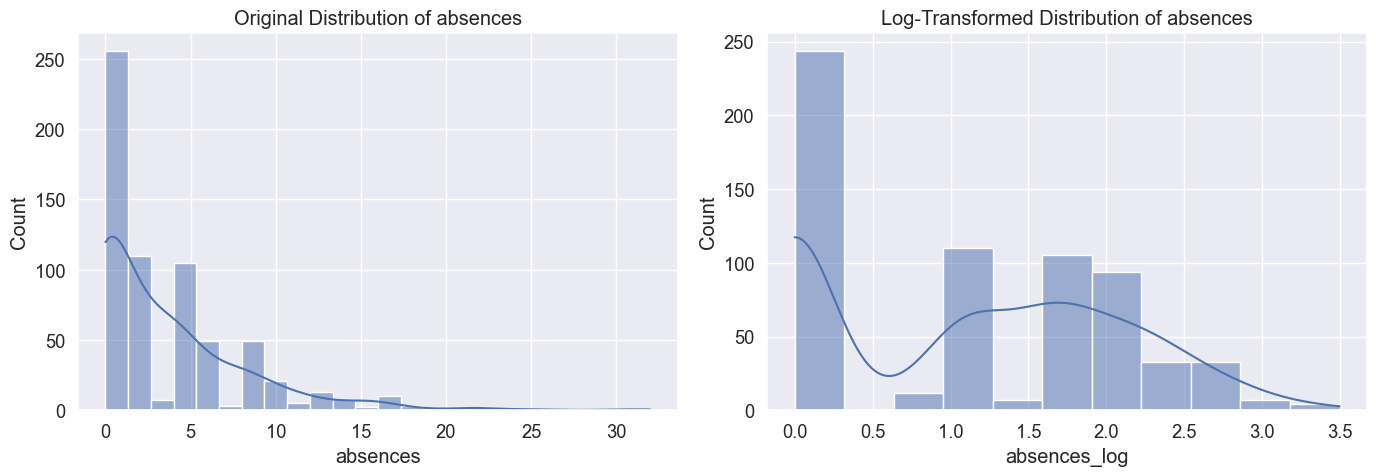


Checking for class imbalance in target variable 'G3'...


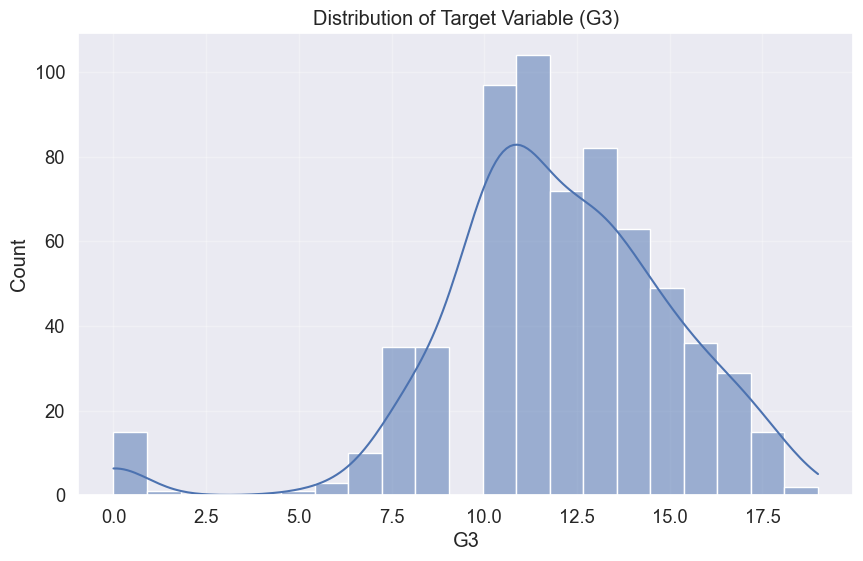

For classification purposes, we could bin the grades:
grade_category
Medium    425
High      194
Low        15
Name: count, dtype: int64


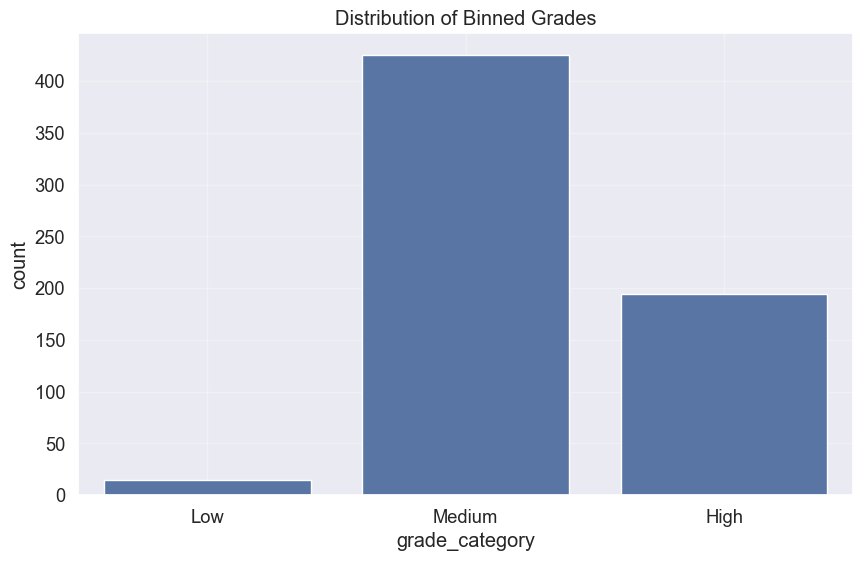


The grade categories are imbalanced. Example of applying SMOTE:
Before SMOTE: Counter({'Medium': 425, 'High': 194, 'Low': 15, nan: 15})
After SMOTE: Counter({'Medium': 425, 'High': 425, 'Low': 425, nan: 425})

Successfully processed the data!

Creating preprocessing pipeline with:
- 17 categorical features
- 13 numerical features

Preprocessing pipeline created successfully.
This pipeline handles:
 - Missing value imputation
 - One-hot encoding for categorical features
 - Standardization for numerical features

To train a model accounting for imbalances, you would:
 1. Apply the preprocessing pipeline
 2. Use class_weight='balanced' for classification models
 3. Or apply SMOTE/other resampling for severe imbalances
 4. Consider using algorithms less sensitive to imbalance (like tree-based models)


In [ ]:
# Set the style for better visualization
plt.style.use('ggplot')
sns.set_theme(font_scale=1.2)

# Fetch the data
student_performance = fetch_ucirepo(id=320)
  
# Get features and targets
X = student_performance.data.features 
y = student_performance.data.targets 

# Combine them for easier processing
data = pd.concat([X, y], axis=1)

# Function to check for and visualize imbalances
def check_imbalances(df, threshold=0.9):
    """
    Check for imbalanced features where one value dominates by more than threshold
    """
    imbalanced_features = {}
    
    # Check categorical features
    categorical_features = df.select_dtypes(include=['object', 'category', 'bool']).columns
    for feature in categorical_features:
        value_counts = df[feature].value_counts(normalize=True)
        if value_counts.iloc[0] > threshold:
            imbalanced_features[feature] = value_counts.iloc[0]
    
    # Check ordinal features that are encoded as numeric
    ordinal_features = ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
                        'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
    ordinal_in_data = [f for f in ordinal_features if f in df.columns]
    
    for feature in ordinal_in_data:
        value_counts = df[feature].value_counts(normalize=True)
        if value_counts.iloc[0] > threshold:
            imbalanced_features[feature] = value_counts.iloc[0]
    
    # Print findings
    if imbalanced_features:
        print(f"Found {len(imbalanced_features)} imbalanced features where one class exceeds {threshold*100}% of data:")
        for feature, percentage in imbalanced_features.items():
            print(f"- {feature}: top class represents {percentage*100:.2f}% of data")
            
        # Visualize the imbalanced features
        fig, axes = plt.subplots(len(imbalanced_features), 1, figsize=(12, 4*len(imbalanced_features)))
        if len(imbalanced_features) == 1:
            axes = [axes]
            
        for i, feature in enumerate(imbalanced_features.keys()):
            sns.countplot(x=feature, data=df, ax=axes[i])
            axes[i].set_title(f'Imbalance in {feature}')
            axes[i].grid(True, alpha=0.3)
            
        plt.tight_layout()
        plt.show()
    else:
        print(f"No features found with one class exceeding {threshold*100}% of data.")

    # Check numerical features for severe skewness
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    skewed_features = {}
    
    for feature in numerical_features:
        if feature not in ordinal_in_data:  # Skip ordinal features already checked
            skewness = df[feature].skew()
            if abs(skewness) > 1.0:  # Common threshold for severe skewness
                skewed_features[feature] = skewness
    
    if skewed_features:
        print(f"\nFound {len(skewed_features)} severely skewed numerical features:")
        for feature, skew_value in skewed_features.items():
            print(f"- {feature}: skewness = {skew_value:.2f}")
            
        # Visualize the skewed features
        fig, axes = plt.subplots(len(skewed_features), 1, figsize=(12, 4*len(skewed_features)))
        if len(skewed_features) == 1:
            axes = [axes]
            
        for i, feature in enumerate(skewed_features.keys()):
            sns.histplot(df[feature], kde=True, ax=axes[i])
            axes[i].set_title(f'Skewed Distribution of {feature} (Skewness = {skewed_features[feature]:.2f})')
            axes[i].grid(True, alpha=0.3)
            
        plt.tight_layout()
        plt.show()
    else:
        print("No severely skewed numerical features found.")
    
    return imbalanced_features, skewed_features

# Check for imbalances
print("Checking for imbalances in features...\n")
imbalanced_features, skewed_features = check_imbalances(data, threshold=0.8)

# Function to handle imbalances
def handle_imbalances(df, imbalanced_features, skewed_features, target='G3'):
    """
    Handle imbalanced and skewed features
    """
    df_processed = df.copy()
    
    # Handle categorical imbalances
    cat_imbalanced = [f for f in imbalanced_features if f in df.select_dtypes(include=['object', 'category', 'bool']).columns]
    if cat_imbalanced:
        print("\nHandling imbalanced categorical features...")
        # For demonstration, we'll keep all features but note which ones might need special attention
        print(f"Note: The following categorical features are highly imbalanced and may need special handling: {cat_imbalanced}")
    
    # Handle skewed numerical features
    if skewed_features:
        print("\nHandling skewed numerical features...")
        for feature in skewed_features:
            # Apply log transformation (adding 1 to handle zeros)
            if (df_processed[feature] >= 0).all():  # Only transform non-negative features
                df_processed[f'{feature}_log'] = np.log1p(df_processed[feature])
                
                # Visualize the transformation
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
                sns.histplot(df_processed[feature], kde=True, ax=ax1)
                ax1.set_title(f'Original Distribution of {feature}')
                sns.histplot(df_processed[f'{feature}_log'], kde=True, ax=ax2)
                ax2.set_title(f'Log-Transformed Distribution of {feature}')
                plt.tight_layout()
                plt.show()
    
    # Check for class imbalance in the target
    if target in df_processed.columns:
        print(f"\nChecking for class imbalance in target variable '{target}'...")
        
        # For regression problems (G3 is a grade from 0-20)
        if target in ['G1', 'G2', 'G3']:
            plt.figure(figsize=(10, 6))
            sns.histplot(df_processed[target], kde=True)
            plt.title(f'Distribution of Target Variable ({target})')
            plt.grid(True, alpha=0.3)
            plt.show()
            
            # We can bin the grades to create a classification problem if needed
            print("For classification purposes, we could bin the grades:")
            df_processed['grade_category'] = pd.cut(df_processed[target], 
                                                   bins=[0, 7, 13, 20], 
                                                   labels=['Low', 'Medium', 'High'])
            
            # Check the distribution of binned categories
            grade_counts = df_processed['grade_category'].value_counts()
            print(grade_counts)
            
            plt.figure(figsize=(10, 6))
            sns.countplot(x='grade_category', data=df_processed)
            plt.title('Distribution of Binned Grades')
            plt.grid(True, alpha=0.3)
            plt.show()
            
            # If imbalanced, we could use SMOTE
            if (grade_counts / grade_counts.sum()).min() < 0.2:  # If any class is less than 20%
                print("\nThe grade categories are imbalanced. Example of applying SMOTE:")
                
                # Prepare data for SMOTE (using a few features for demonstration)
                features_for_smote = ['age', 'studytime', 'failures', 'absences']
                X_sample = df_processed[features_for_smote]
                
                # Convert categorical target to numeric for SMOTE
                # This is the fix: We need to encode the categorical labels
                le = LabelEncoder()
                y_sample_encoded = le.fit_transform(df_processed['grade_category'])
                
                try:
                    # Apply SMOTE
                    smote = SMOTE(random_state=42)
                    X_resampled, y_resampled_encoded = smote.fit_resample(X_sample, y_sample_encoded)
                    
                    # Convert back to original labels
                    y_resampled = pd.Series(le.inverse_transform(y_resampled_encoded), name='grade_category')
                    
                    # Show the results
                    print("Before SMOTE:", Counter(df_processed['grade_category']))
                    print("After SMOTE:", Counter(y_resampled))
                except Exception as e:
                    print(f"SMOTE could not be applied due to an error: {e}")
                    print("Consider using class weights instead.")
    
    return df_processed

# Handle the imbalances
try:
    processed_data = handle_imbalances(data, imbalanced_features, skewed_features)
    print("\nSuccessfully processed the data!")
except Exception as e:
    print(f"Error during processing: {e}")
    print("Continuing with original data...")
    processed_data = data

# Create a preprocessing pipeline
def create_preprocessing_pipeline(df):
    """
    Create a preprocessing pipeline to handle feature transformations
    """
    # Identify column types
    categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # Remove target from features
    for target in ['G1', 'G2', 'G3']:
        if target in numerical_features:
            numerical_features.remove(target)
    
    # For demonstration purposes
    print("\nCreating preprocessing pipeline with:")
    print(f"- {len(categorical_features)} categorical features")
    print(f"- {len(numerical_features)} numerical features")
    
    # Create preprocessing steps
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    # Create preprocessor
    preprocessor = ColumnTransformer(transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])
    
    return preprocessor

# Create a preprocessing pipeline
preprocessor = create_preprocessing_pipeline(data)

print("\nPreprocessing pipeline created successfully.")
print("This pipeline handles:")
print(" - Missing value imputation")
print(" - One-hot encoding for categorical features")
print(" - Standardization for numerical features")
print("\nTo train a model accounting for imbalances, you would:")
print(" 1. Apply the preprocessing pipeline")
print(" 2. Use class_weight='balanced' for classification models")
print(" 3. Or apply SMOTE/other resampling for severe imbalances")
print(" 4. Consider using algorithms less sensitive to imbalance (like tree-based models)")